<center> <h1>Maestría Oficial en Big Data y Data Science</h1> </center>

<center> <h3>Sistemas de recomendación</h3> </center>

<center> <h3>14MBID Trabajo Fin de Máster</h3> </center>

Alumno: Arias Ortiz, Edisson Santiago

Tutora: Pascual Venteo, Ana Belén 

DNI: 010XXXX052

Fecha de entrega: 23/05/2022

Los datos usados en el presente proyecto pueden ser extraidos de la plataforma [Kaggle](https://www.kaggle.com/datasets/frtgnn/dunnhumby-the-complete-journey). O de la página oficial [Dunnhumby
Source files](https://www.dunnhumby.com/source-files/)

### Importamos las librerias

In [1]:
import os
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
os.chdir("C:/Users/Usuario/Documents/TESIS VIU")

### Cargamos las transacciones

In [3]:
transacciones = pd.read_csv('transaction_data.csv')
transacciones.head(6)

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0
5,2375,26984851516,1,826249,2,1.98,364,-0.60,1642,1,0.0,0.0


In [4]:
transacciones.dtypes

household_key          int64
BASKET_ID              int64
DAY                    int64
PRODUCT_ID             int64
QUANTITY               int64
SALES_VALUE          float64
STORE_ID               int64
RETAIL_DISC          float64
TRANS_TIME             int64
WEEK_NO                int64
COUPON_DISC          float64
COUPON_MATCH_DISC    float64
dtype: object

In [5]:
print(transacciones.shape)
dft=transacciones.copy()
print(dft.shape)

(2595732, 12)
(2595732, 12)


In [6]:
#Seleccionamos solo las variables necesarias para el analisis
dft=dft.loc[:, ['BASKET_ID', 'PRODUCT_ID','QUANTITY']]
#Renombramos las variables
dft=dft.rename(columns={'BASKET_ID':'FACTURA','PRODUCT_ID':'ID_PRODUCTO','QUANTITY':'CANTIDAD'})
dft.head(6)

,FACTURA,ID_PRODUCTO,CANTIDAD
0,26984851472,1004906,1
1,26984851472,1033142,1
2,26984851472,1036325,1
3,26984851472,1082185,1
4,26984851472,8160430,1
5,26984851516,826249,2


### Cargamos los productos

In [7]:
productos=pd.read_csv('product.csv')
productos.head(6)

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ
5,26426,69,GROCERY,Private,SPICES & EXTRACTS,SPICES & SEASONINGS,2.5 OZ


In [8]:
productos.dtypes

PRODUCT_ID               int64
MANUFACTURER             int64
DEPARTMENT              object
BRAND                   object
COMMODITY_DESC          object
SUB_COMMODITY_DESC      object
CURR_SIZE_OF_PRODUCT    object
dtype: object

In [9]:
print(productos.shape)
dfp=productos.copy()
print(dfp.shape)

(92353, 7)
(92353, 7)


In [10]:
#Seleccionamos solo las variables necesarias para el analisis
dfp=dfp.loc[:, ['PRODUCT_ID', 'SUB_COMMODITY_DESC']]
#Renombramos las variables
dfp=dfp.rename(columns={'PRODUCT_ID':'ID_PRODUCTO','SUB_COMMODITY_DESC':'ARTICULO_DESC'})
dfp.head(6)

,ID_PRODUCTO,ARTICULO_DESC
0,25671,ICE - CRUSHED/CUBED
1,26081,NO SUBCOMMODITY DESCRIPTION
2,26093,BREAD:ITALIAN/FRENCH
3,26190,APPLE SAUCE
4,26355,SPECIALTY COOKIES
5,26426,SPICES & SEASONINGS


### Unimos los dataframe transaccion con las descripciones de los productos

In [11]:
trans_prod=pd.merge(dft,dfp,on=['ID_PRODUCTO'])
trans_prod.head(5)

,FACTURA,ID_PRODUCTO,CANTIDAD,ARTICULO_DESC
0,26984851472,1004906,1,POTATOES RUSSET (BULK&BAG)
1,27021022215,1004906,1,POTATOES RUSSET (BULK&BAG)
2,27021090189,1004906,1,POTATOES RUSSET (BULK&BAG)
3,27031467254,1004906,1,POTATOES RUSSET (BULK&BAG)
4,27057508267,1004906,1,POTATOES RUSSET (BULK&BAG)


In [12]:
trans_prod.shape

(2595732, 4)

In [13]:
#Eliminamos los espacios en blanco de la columna del producto
trans_prod['ARTICULO_DESC'] = trans_prod['ARTICULO_DESC'].str.strip()
#Eliminamos los registros que no tienen descripcion de producto
trans_prod.drop(trans_prod[trans_prod['ARTICULO_DESC']==''].index, inplace = True)

In [14]:
trans_prod.shape

(2587893, 4)

In [15]:
trans_prod.loc[trans_prod['FACTURA']==26984851516] 

,FACTURA,ID_PRODUCTO,CANTIDAD,ARTICULO_DESC
36243,26984851516,826249,2,HAMBURGER BUNS
41748,26984851516,1043142,1,SPONGES: BATH HOUSEHOLD
41838,26984851516,1085983,1,TRAY PACK/CHOC CHIP COOKIES
42161,26984851516,1102651,1,PEANUT BUTTER
42218,26984851516,6423775,1,GRAHAM CRACKERS
42249,26984851516,9487839,1,GRAHAM CRACKERS


In [16]:
trans_prod.isnull().sum()

FACTURA          0
ID_PRODUCTO      0
CANTIDAD         0
ARTICULO_DESC    0
dtype: int64

Agrupamos por factura, obtenemos la cantidad de veces que aparece un producto por cada factura.

In [17]:
trans = trans_prod.groupby(['FACTURA','ARTICULO_DESC'])['CANTIDAD'].sum()#.reset_index()
trans

FACTURA      ARTICULO_DESC             
26984851472  BANANAS                       1
             CELERY                        1
             ONIONS SWEET (BULK&BAG)       1
             ORGANIC CARROTS               1
             POTATOES RUSSET (BULK&BAG)    1
                                          ..
42305362535  MACARONI & CHEESE DNRS        1
             MARGARINE: TUBS AND BOWLS     1
             PEANUT BUTTER                 1
             SHREDDED CHEESE               1
             SOUR CREAMS                   1
Name: CANTIDAD, Length: 2197355, dtype: int64

Realizamos pivote de la tabla anterior colocando como columnas todos los productos, y como filas las facturas.

In [18]:
trans = trans.unstack()
trans.head()

ARTICULO_DESC,*ATH ACCES:TOWEL BARS/SOAP D,*ATTERIES:CAMERA/FLASH/WATCH,*BOYS/GIRLS MISC TOYS,*GOURMET/UPSCALE,*MISC. LOBBY ITEMS,*PURSES UMBRELLAS,*SCRAPBOOK,*SLEDS-WINTER TOYS,*SPORT NOVELTIES,*SPORTS APPAREL,...,WRITING INSTRUMENTS,XMAS PLUSH,YARDLEY,YEAST: DRY,YELLOW JACKET,YELLOW SUMMER SQUASH,YNG MEN SCREEN PRINT T-SHIRTS,YOGURT,YOGURT MULTI-PACKS,YOGURT NOT MULTI-PACKS
FACTURA,,,,,,,,,,,,,,,,,,,,,
26984851472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26984851516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26984896261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26984905972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26984945254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Obtenemos como resultado cuantos productos han sido adquiridos por transaccion o factura

Como obtenemos datos nulos, los reemplazamos por 0

In [19]:
canasta = trans.fillna(0)
canasta.head()

ARTICULO_DESC,*ATH ACCES:TOWEL BARS/SOAP D,*ATTERIES:CAMERA/FLASH/WATCH,*BOYS/GIRLS MISC TOYS,*GOURMET/UPSCALE,*MISC. LOBBY ITEMS,*PURSES UMBRELLAS,*SCRAPBOOK,*SLEDS-WINTER TOYS,*SPORT NOVELTIES,*SPORTS APPAREL,...,WRITING INSTRUMENTS,XMAS PLUSH,YARDLEY,YEAST: DRY,YELLOW JACKET,YELLOW SUMMER SQUASH,YNG MEN SCREEN PRINT T-SHIRTS,YOGURT,YOGURT MULTI-PACKS,YOGURT NOT MULTI-PACKS
FACTURA,,,,,,,,,,,,,,,,,,,,,
26984851472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26984851516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26984896261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26984905972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26984945254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Hacemos el cambio de los valores a 0 y 1, siendo 1 cuando si existe un producto en una transaccion (se ha realizado la compra de ese producto)

In [20]:
def encode_units(x):
  if x <= 0:
    return 0
  if x >= 1:
    return 1

canasta_encode = canasta.applymap(encode_units)
canasta_encode.head()

ARTICULO_DESC,*ATH ACCES:TOWEL BARS/SOAP D,*ATTERIES:CAMERA/FLASH/WATCH,*BOYS/GIRLS MISC TOYS,*GOURMET/UPSCALE,*MISC. LOBBY ITEMS,*PURSES UMBRELLAS,*SCRAPBOOK,*SLEDS-WINTER TOYS,*SPORT NOVELTIES,*SPORTS APPAREL,...,WRITING INSTRUMENTS,XMAS PLUSH,YARDLEY,YEAST: DRY,YELLOW JACKET,YELLOW SUMMER SQUASH,YNG MEN SCREEN PRINT T-SHIRTS,YOGURT,YOGURT MULTI-PACKS,YOGURT NOT MULTI-PACKS
FACTURA,,,,,,,,,,,,,,,,,,,,,
26984851472,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26984851516,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26984896261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26984905972,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26984945254,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
canasta_encode.shape

(276176, 2382)

El metodo apriori no trabaja con valores nulos por lo que se coloca 0 sin encuentra valores nulos

In [22]:
canasta_encode = canasta_encode.fillna(0)
canasta_encode.head()

ARTICULO_DESC,*ATH ACCES:TOWEL BARS/SOAP D,*ATTERIES:CAMERA/FLASH/WATCH,*BOYS/GIRLS MISC TOYS,*GOURMET/UPSCALE,*MISC. LOBBY ITEMS,*PURSES UMBRELLAS,*SCRAPBOOK,*SLEDS-WINTER TOYS,*SPORT NOVELTIES,*SPORTS APPAREL,...,WRITING INSTRUMENTS,XMAS PLUSH,YARDLEY,YEAST: DRY,YELLOW JACKET,YELLOW SUMMER SQUASH,YNG MEN SCREEN PRINT T-SHIRTS,YOGURT,YOGURT MULTI-PACKS,YOGURT NOT MULTI-PACKS
FACTURA,,,,,,,,,,,,,,,,,,,,,
26984851472,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26984851516,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26984896261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26984905972,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26984945254,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Buscamos registros en donde si hayan articulos vendidos en la factura

In [23]:
canasta_encode1=canasta_encode.reset_index()
dfp1=canasta_encode1.loc[:, ['FACTURA','POTATOES RUSSET (BULK&BAG)', 'ONIONS SWEET (BULK&BAG)','CELERY','BANANAS','ORGANIC CARROTS','*GOURMET/UPSCALE']]
dfp1

ARTICULO_DESC,FACTURA,POTATOES RUSSET (BULK&BAG),ONIONS SWEET (BULK&BAG),CELERY,BANANAS,ORGANIC CARROTS,*GOURMET/UPSCALE
0,26984851472,1,1,1,1,1,0
1,26984851516,0,0,0,0,0,0
2,26984896261,0,0,0,0,0,0
3,26984905972,0,0,0,0,0,0
4,26984945254,0,0,0,0,0,0
...,...,...,...,...,...,...,...
276171,42302712006,0,0,0,0,0,0
276172,42302712189,0,0,0,0,0,0
276173,42302712298,0,0,0,0,0,0
276174,42305362497,0,0,0,0,0,0


Imprimimos el ejemplo 

In [24]:
dfp1.loc[dfp1['FACTURA']==26984851472] 

ARTICULO_DESC,FACTURA,POTATOES RUSSET (BULK&BAG),ONIONS SWEET (BULK&BAG),CELERY,BANANAS,ORGANIC CARROTS,*GOURMET/UPSCALE
0,26984851472,1,1,1,1,1,0


In [81]:
#trans_prod
trans_prod[trans_prod['ARTICULO_DESC']=='FLUID MILK WHITE ONLY']['ARTICULO_DESC'].count()
#--2587893

65764

Imprimimos el top 20 de los articulos mas comprados para poder comprar con los resultados de los modelos

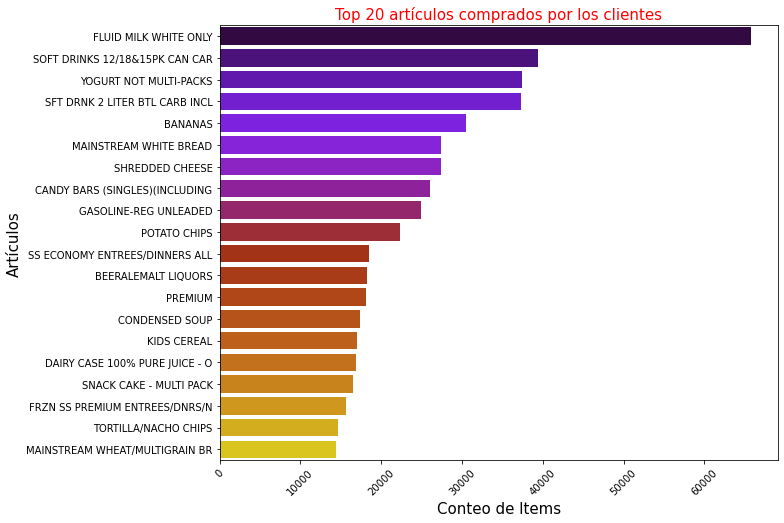

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
sns.barplot(y = trans_prod.ARTICULO_DESC.value_counts().head(20).index, x = trans_prod.ARTICULO_DESC.value_counts().head(20).values, palette = 'gnuplot')
plt.xlabel('Conteo de Items', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Artículos', size = 15)
plt.title('Top 20 artículos comprados por los clientes', color = 'red', size = 15)
plt.show()

Filtro por soporte (frecuencia con la que aparece un producto)

Generar un conjunto de elementos frecuentes que tengan un valor de soporte minimo del 2%; es decir, que tenga una frecuencia de al menos 2% del total de transacciones.

Top de articulos que se venden con mayor frecuencia

In [72]:
trans_prod['FACTURA'].nunique()

276176

Usando el 'algoritmo a priori' con min_support=0.02 (2% de 276.176) significa que el artículo debe estar presente en al menos 5.523 transacciones de 276.176 transacciones solo cuando consideramos ese artículo en el conjunto de artículos frecuentes

In [78]:
my_frequent_itemsets_02 = apriori(canasta_encode, min_support=0.02, use_colnames=True)
my_frequent_itemsets_02.sort_values(by='support', ascending=False).head(20)

,support,itemsets
25,0.221996,(FLUID MILK WHITE ONLY)
3,0.109724,(BANANAS)
43,0.097098,(MAINSTREAM WHITE BREAD)
73,0.092850,(SOFT DRINKS 12/18&15PK CAN CAR)
30,0.090348,(GASOLINE-REG UNLEADED)
66,0.084892,(SFT DRNK 2 LITER BTL CARB INCL)
69,0.076169,(SHREDDED CHEESE)
54,0.065657,(POTATO CHIPS)
7,0.059071,(CANDY BARS (SINGLES)(INCLUDING)
21,0.058731,(DAIRY CASE 100% PURE JUICE - O)


Ahora haciendo las reglas a partir del conjunto de elementos frecuentes generado anteriormente

In [88]:
reglas_02 = association_rules(my_frequent_itemsets_02, metric="lift", min_threshold=2)
reglas_02.sort_values('confidence', ascending = False, inplace = True)
reglas_02.head(40)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
16,(KIDS CEREAL),(FLUID MILK WHITE ONLY),0.046517,0.221996,0.030437,0.654316,2.947422,0.020110,2.250623
0,(ALL FAMILY CEREAL),(FLUID MILK WHITE ONLY),0.037139,0.221996,0.024108,0.649118,2.924005,0.015863,2.217279
9,(DAIRY CASE 100% PURE JUICE - O),(FLUID MILK WHITE ONLY),0.058731,0.221996,0.034543,0.588163,2.649428,0.021505,1.889105
13,(EGGS - X-LARGE),(FLUID MILK WHITE ONLY),0.034398,0.221996,0.020063,0.583263,2.627357,0.012427,1.866895
11,(EGGS - LARGE),(FLUID MILK WHITE ONLY),0.047875,0.221996,0.027363,0.571547,2.574583,0.016735,1.815846
14,(IWS SINGLE CHEESE),(FLUID MILK WHITE ONLY),0.041267,0.221996,0.022529,0.545933,2.459201,0.013368,1.713413
21,(MAINSTREAM WHITE BREAD),(FLUID MILK WHITE ONLY),0.097098,0.221996,0.050870,0.523904,2.359968,0.029314,1.634131
19,(MAINSTREAM WHEAT/MULTIGRAIN BR),(FLUID MILK WHITE ONLY),0.050805,0.221996,0.026563,0.522842,2.355187,0.015284,1.630496
33,(YOGURT NOT MULTI-PACKS),(FLUID MILK WHITE ONLY),0.046713,0.221996,0.024423,0.522828,2.355121,0.014053,1.630446
29,(SNACK CAKE - MULTI PACK),(FLUID MILK WHITE ONLY),0.039421,0.221996,0.020411,0.517773,2.332354,0.011660,1.613358


In [29]:
my_frequent_itemsets_04 = apriori(canasta_encode, min_support=0.04, use_colnames=True)
my_frequent_itemsets_04.sort_values(by='support', ascending=False).head(20)

,support,itemsets
6,0.221996,(FLUID MILK WHITE ONLY)
0,0.109724,(BANANAS)
11,0.097098,(MAINSTREAM WHITE BREAD)
18,0.092850,(SOFT DRINKS 12/18&15PK CAN CAR)
7,0.090348,(GASOLINE-REG UNLEADED)
15,0.084892,(SFT DRNK 2 LITER BTL CARB INCL)
17,0.076169,(SHREDDED CHEESE)
12,0.065657,(POTATO CHIPS)
2,0.059071,(CANDY BARS (SINGLES)(INCLUDING)
4,0.058731,(DAIRY CASE 100% PURE JUICE - O)


In [91]:
reglas_04 = association_rules(my_frequent_itemsets_04, metric="lift", min_threshold=2)
reglas_04.sort_values('confidence', ascending = False, inplace = True)
reglas_04.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(MAINSTREAM WHITE BREAD),(FLUID MILK WHITE ONLY),0.097098,0.221996,0.050870,0.523904,2.359968,0.029314,1.634131
1,(BANANAS),(FLUID MILK WHITE ONLY),0.109724,0.221996,0.056634,0.516154,2.325056,0.032276,1.607956
0,(FLUID MILK WHITE ONLY),(BANANAS),0.221996,0.109724,0.056634,0.255113,2.325056,0.032276,1.195184
2,(FLUID MILK WHITE ONLY),(MAINSTREAM WHITE BREAD),0.221996,0.097098,0.050870,0.229147,2.359968,0.029314,1.171303


In [31]:
my_frequent_itemsets_05 = apriori(canasta_encode, min_support=0.05, use_colnames=True)
my_frequent_itemsets_05.sort_values(by='support', ascending=False).head(20)

,support,itemsets
4,0.221996,(FLUID MILK WHITE ONLY)
0,0.109724,(BANANAS)
7,0.097098,(MAINSTREAM WHITE BREAD)
12,0.092850,(SOFT DRINKS 12/18&15PK CAN CAR)
5,0.090348,(GASOLINE-REG UNLEADED)
10,0.084892,(SFT DRNK 2 LITER BTL CARB INCL)
11,0.076169,(SHREDDED CHEESE)
8,0.065657,(POTATO CHIPS)
2,0.059071,(CANDY BARS (SINGLES)(INCLUDING)
3,0.058731,(DAIRY CASE 100% PURE JUICE - O)


In [71]:
reglas_05 = association_rules(my_frequent_itemsets_05, metric="lift", min_threshold=2)
reglas_05.sort_values('confidence', ascending = False, inplace = True)
reglas_05.head(40)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(MAINSTREAM WHITE BREAD),(FLUID MILK WHITE ONLY),0.097098,0.221996,0.050870,0.523904,2.359968,0.029314,1.634131
1,(BANANAS),(FLUID MILK WHITE ONLY),0.109724,0.221996,0.056634,0.516154,2.325056,0.032276,1.607956
0,(FLUID MILK WHITE ONLY),(BANANAS),0.221996,0.109724,0.056634,0.255113,2.325056,0.032276,1.195184
2,(FLUID MILK WHITE ONLY),(MAINSTREAM WHITE BREAD),0.221996,0.097098,0.050870,0.229147,2.359968,0.029314,1.171303


In [33]:
my_frequent_itemsets_06 = apriori(canasta_encode, min_support=0.06, use_colnames=True)
my_frequent_itemsets_06.sort_values(by='support', ascending=False).head(20)

,support,itemsets
1,0.221996,(FLUID MILK WHITE ONLY)
0,0.109724,(BANANAS)
3,0.097098,(MAINSTREAM WHITE BREAD)
7,0.092850,(SOFT DRINKS 12/18&15PK CAN CAR)
2,0.090348,(GASOLINE-REG UNLEADED)
5,0.084892,(SFT DRNK 2 LITER BTL CARB INCL)
6,0.076169,(SHREDDED CHEESE)
4,0.065657,(POTATO CHIPS)


In [34]:
reglas_06 = association_rules(my_frequent_itemsets_06, metric="lift", min_threshold=1)
reglas_06.sort_values('confidence', ascending = False, inplace = True)
reglas_06.head(40)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [35]:
my_frequent_itemsets_08 = apriori(canasta_encode, min_support=0.08, use_colnames=True)
my_frequent_itemsets_08.sort_values(by='support', ascending=False).head(20)

,support,itemsets
1,0.221996,(FLUID MILK WHITE ONLY)
0,0.109724,(BANANAS)
3,0.097098,(MAINSTREAM WHITE BREAD)
5,0.092850,(SOFT DRINKS 12/18&15PK CAN CAR)
2,0.090348,(GASOLINE-REG UNLEADED)
4,0.084892,(SFT DRNK 2 LITER BTL CARB INCL)


In [36]:
reglas_08 = association_rules(my_frequent_itemsets_08, metric="lift", min_threshold=1)
reglas_08.sort_values('confidence', ascending = False, inplace = True)
reglas_08.head(40)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [37]:
my_frequent_itemsets_10 = apriori(canasta_encode, min_support=0.10, use_colnames=True)
my_frequent_itemsets_10.sort_values(by='support', ascending=False).head(20)

,support,itemsets
1,0.221996,(FLUID MILK WHITE ONLY)
0,0.109724,(BANANAS)


In [38]:
reglas_10 = association_rules(my_frequent_itemsets_10, metric="lift", min_threshold=1)
reglas_10.sort_values('confidence', ascending = False, inplace = True)
reglas_10.head(40)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


### Ejemplo detallado

Filtro por soporte (frecuencia con la que aparece un producto)

Generar un conjunto de elementos frecuentes que tengan un valor de soporte minimo del 5%; es decir, que tenga una frecuencia de al menos 5% del total de transacciones.

Top de articulos que se venden con mayor frecuencia

In [92]:
my_frequent_itemsets = apriori(canasta_encode, min_support=0.05, use_colnames=True)
my_frequent_itemsets.sort_values(by='support', ascending=False)

,support,itemsets
4,0.221996,(FLUID MILK WHITE ONLY)
0,0.109724,(BANANAS)
7,0.097098,(MAINSTREAM WHITE BREAD)
12,0.092850,(SOFT DRINKS 12/18&15PK CAN CAR)
5,0.090348,(GASOLINE-REG UNLEADED)
10,0.084892,(SFT DRNK 2 LITER BTL CARB INCL)
11,0.076169,(SHREDDED CHEESE)
8,0.065657,(POTATO CHIPS)
2,0.059071,(CANDY BARS (SINGLES)(INCLUDING)
3,0.058731,(DAIRY CASE 100% PURE JUICE - O)


En la tabla anterior se puede verificar que los FLUID MILK WHITE ONLY aparece el total de 22.19% del total de transacciones, seguido por BANANAS 10.97%, MAINSTREAM WHITE BREAD 9.7%, etc.

Analisis de la relacion entre los productos, que articulos se compran juntos con mayor frecuencia.

**Reglas de asociacion**

Se utiliza la metrica de evaluacion lift para generar reglas de asociacion. Se considera como minimo un lift = 1 (min_threshold)

In [23]:
reglas = association_rules(my_frequent_itemsets, metric="lift", min_threshold=1)
reglas.sort_values('confidence', ascending = False, inplace = True)
reglas.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(BANANAS),(FLUID MILK WHITE ONLY),0.109724,0.221996,0.056634,0.516154,2.325056,0.032276,1.607956
1,(FLUID MILK WHITE ONLY),(BANANAS),0.221996,0.109724,0.056634,0.255113,2.325056,0.032276,1.195184
2,(MAINSTREAM WHITE BREAD),(FLUID MILK WHITE ONLY),0.097098,0.221996,0.050870,0.523904,2.359968,0.029314,1.634131
3,(FLUID MILK WHITE ONLY),(MAINSTREAM WHITE BREAD),0.221996,0.097098,0.050870,0.229147,2.359968,0.029314,1.171303


Con el analisis anterior de antecedente y consecuente podemos verificar que:
- un 10.97% de las veces ha aparecido BANANAS y el 22.19% de las veces de nuestras transacciones a aparecido FLUID MILK WHITE ONLY en la misma transacción.
- un 9.7% de las veces ha aparecido MAINSTREAM WHITE BREAD y el 22.19% de las veces de nuestras transacciones a aparecido FLUID MILK WHITE ONLY en la misma transacción.

Tambien podemos darnos cuenta con el soporte que:
- el porcentaje de veces que se compra FLUID MILK WHITE ONLY dado que se compra BANANAS es del 5.6%.
- el porcentaje de veces que se compra FLUID MILK WHITE ONLY dado que se compra MAINSTREAM WHITE BREAD es del 5.08%

Nos importa la columna lift ya que nos indica por ejemplo que las BANANAS y FLUID MILK WHITE ONLY (primer registro) ocurre 2.32 veces mas que el azar, entonces se dice que existe una relacion entre estos dos productos.

---
**Conclusion**

Como decision estrategica de marketing podria ser colocar las BANANAS, MAINSTREAM WHITE BREAD y FLUID MILK WHITE ONLY cerca para incrementar las posibilidades de venta cruzada.

Dirigir campañas de Marketing enfocados en productos que los clientes compraron recientemente y que se asocien segun el analisis anterior.

# RED NEURONAL

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
os.chdir("C:/Users/Usuario/Documents/TESIS VIU")

In [3]:
transacciones = pd.read_csv('transaction_data.csv')
transacciones.head(6)

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0
5,2375,26984851516,1,826249,2,1.98,364,-0.60,1642,1,0.0,0.0


In [4]:
print(transacciones.shape)
dft=transacciones.copy()
print(dft.shape)

(2595732, 12)
(2595732, 12)


In [5]:
#Seleccionamos solo las variables necesarias para el analisis
dft=dft.loc[:, ['household_key','BASKET_ID', 'PRODUCT_ID','QUANTITY']]
#Renombramos las variables
dft=dft.rename(columns={'household_key':'COD_FAMILIA','BASKET_ID':'FACTURA',
                        'PRODUCT_ID':'ID_PRODUCTO','QUANTITY':'CANTIDAD'})

Codificamos los codigos de cada familia

In [6]:
dft['COD_FAMILIA']=dft['COD_FAMILIA'].apply(str)
dft['COD_FAMILIA']=dft.COD_FAMILIA.str.pad(4,side='left',fillchar='0')
dft['COD_FAMILIA']='FMLA - '+dft['COD_FAMILIA']

In [7]:
dft

,COD_FAMILIA,FACTURA,ID_PRODUCTO,CANTIDAD
0,FMLA - 2375,26984851472,1004906,1
1,FMLA - 2375,26984851472,1033142,1
2,FMLA - 2375,26984851472,1036325,1
3,FMLA - 2375,26984851472,1082185,1
4,FMLA - 2375,26984851472,8160430,1
...,...,...,...,...
2595727,FMLA - 1598,42305362535,92130,1
2595728,FMLA - 1598,42305362535,114102,1
2595729,FMLA - 1598,42305362535,133449,1
2595730,FMLA - 1598,42305362535,6923644,1


In [8]:
productos=pd.read_csv('product.csv')
productos.head(6)

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ
5,26426,69,GROCERY,Private,SPICES & EXTRACTS,SPICES & SEASONINGS,2.5 OZ


In [9]:
print(productos.shape)
dfp=productos.copy()
print(dfp.shape)

(92353, 7)
(92353, 7)


In [10]:
#Seleccionamos solo las variables necesarias para el analisis
dfp=dfp.loc[:, ['PRODUCT_ID', 'SUB_COMMODITY_DESC']]
#Renombramos las variables
dfp=dfp.rename(columns={'PRODUCT_ID':'ID_PRODUCTO','SUB_COMMODITY_DESC':'ARTICULO_DESC'})
dfp.head(6)

,ID_PRODUCTO,ARTICULO_DESC
0,25671,ICE - CRUSHED/CUBED
1,26081,NO SUBCOMMODITY DESCRIPTION
2,26093,BREAD:ITALIAN/FRENCH
3,26190,APPLE SAUCE
4,26355,SPECIALTY COOKIES
5,26426,SPICES & SEASONINGS


Unimos las transacciones y los productos

In [11]:
trans_prod=pd.merge(dft,dfp,on=['ID_PRODUCTO'])
trans_prod.head(5)

,COD_FAMILIA,FACTURA,ID_PRODUCTO,CANTIDAD,ARTICULO_DESC
0,FMLA - 2375,26984851472,1004906,1,POTATOES RUSSET (BULK&BAG)
1,FMLA - 1929,27021022215,1004906,1,POTATOES RUSSET (BULK&BAG)
2,FMLA - 0568,27021090189,1004906,1,POTATOES RUSSET (BULK&BAG)
3,FMLA - 0887,27031467254,1004906,1,POTATOES RUSSET (BULK&BAG)
4,FMLA - 0175,27057508267,1004906,1,POTATOES RUSSET (BULK&BAG)


In [12]:
#Eliminamos los espacios en blanco de la columna del producto
trans_prod['ARTICULO_DESC'] = trans_prod['ARTICULO_DESC'].str.strip()
#Eliminamos los registros que no tienen descripcion de producto
trans_prod.drop(trans_prod[trans_prod['ARTICULO_DESC']==''].index, inplace = True)

Agrupamos por familia y articulos. Sumamos las facturas y la cantidad de los productos que aparecen en cada factura

In [13]:
customers = trans_prod.groupby(['COD_FAMILIA','ARTICULO_DESC'], as_index=False).agg({
    'FACTURA': 'count',
    'CANTIDAD': 'sum'})

#Renombramos las variables
customers=customers.rename(columns={'FACTURA':'NUM_FACTURAS'})
customers

,COD_FAMILIA,ARTICULO_DESC,NUM_FACTURAS,CANTIDAD
0,FMLA - 0001,ADULT ANALGESICS,3,3
1,FMLA - 0001,ADULT CEREAL,2,2
2,FMLA - 0001,AEROSOL TOPPINGS,1,1
3,FMLA - 0001,AIR CARE - AEROSOLS,1,1
4,FMLA - 0001,AIR CARE - CANDLES,6,6
...,...,...,...,...
614454,FMLA - 2500,WRITING INSTRUMENTS,2,2
614455,FMLA - 2500,YELLOW SUMMER SQUASH,1,1
614456,FMLA - 2500,YOGURT,4,6
614457,FMLA - 2500,YOGURT MULTI-PACKS,6,6


#### Transformar a numero los clientes y los articulos

- ARTICULOS


Cada descripcion de articulo se convierte en un ID numerico

In [14]:
customers['ART_ID'], lst_articulos = pd.factorize( customers.ARTICULO_DESC, sort=True)

In [15]:
df_arts= pd.DataFrame( {
    'ART_ID': range(0, len( lst_articulos )), 
    'ART': lst_articulos } )

In [16]:
df_arts

,ART_ID,ART
0,0,*ATH ACCES:TOWEL BARS/SOAP D
1,1,*ATTERIES:CAMERA/FLASH/WATCH
2,2,*BOYS/GIRLS MISC TOYS
3,3,*GOURMET/UPSCALE
4,4,*MISC. LOBBY ITEMS
...,...,...
2377,2377,YELLOW SUMMER SQUASH
2378,2378,YNG MEN SCREEN PRINT T-SHIRTS
2379,2379,YOGURT
2380,2380,YOGURT MULTI-PACKS


In [17]:
df_arts.loc[ df_arts['ART_ID'].isin([2377, 2100, 2381]) ]

,ART_ID,ART
2100,2100,SPORTS-SPECTATOR-MAGAZINE
2377,2377,YELLOW SUMMER SQUASH
2381,2381,YOGURT NOT MULTI-PACKS


- CLIENTES

Cada descripcion de familia se convierte en un ID numerico

In [18]:
customers['CLTE_ID'], lst_cltes = pd.factorize( customers.COD_FAMILIA, sort=True)

In [19]:
df_cltes= pd.DataFrame( {
    'CLTE_ID': range(0, len( lst_cltes )), 
    'CLTE': lst_cltes } )
df_cltes

,CLTE_ID,CLTE
0,0,FMLA - 0001
1,1,FMLA - 0002
2,2,FMLA - 0003
3,3,FMLA - 0004
4,4,FMLA - 0005
...,...,...
2495,2495,FMLA - 2496
2496,2496,FMLA - 2497
2497,2497,FMLA - 2498
2498,2498,FMLA - 2499


In [20]:
customers

,COD_FAMILIA,ARTICULO_DESC,NUM_FACTURAS,CANTIDAD,ART_ID,CLTE_ID
0,FMLA - 0001,ADULT ANALGESICS,3,3,21,0
1,FMLA - 0001,ADULT CEREAL,2,2,22,0
2,FMLA - 0001,AEROSOL TOPPINGS,1,1,30,0
3,FMLA - 0001,AIR CARE - AEROSOLS,1,1,35,0
4,FMLA - 0001,AIR CARE - CANDLES,6,6,36,0
...,...,...,...,...,...,...
614454,FMLA - 2500,WRITING INSTRUMENTS,2,2,2372,2499
614455,FMLA - 2500,YELLOW SUMMER SQUASH,1,1,2377,2499
614456,FMLA - 2500,YOGURT,4,6,2379,2499
614457,FMLA - 2500,YOGURT MULTI-PACKS,6,6,2380,2499


#### Calcular rating

Uno ficticio con la frecuencia de venta de los productos
- 5 sería el producto con mayor cantidad de facturas por cliente
- 1 sería el producto con menor cantidad de facturas por cliente

Para esto se debe crear dos columnas, con group by para max y min (por clte), y luego de hace el calculo

In [21]:
customers.groupby( ['COD_FAMILIA']).NUM_FACTURAS.max()

COD_FAMILIA
FMLA - 0001    53
FMLA - 0002    30
FMLA - 0003    50
FMLA - 0004    15
FMLA - 0005    10
               ..
FMLA - 2496    57
FMLA - 2497    82
FMLA - 2498    29
FMLA - 2499    33
FMLA - 2500    39
Name: NUM_FACTURAS, Length: 2500, dtype: int64

Obtenemos la cantidad minima y maxima frecuencia de NUM_FACTURAS por cada codigo de familia

In [22]:
customers= customers.assign(MAX_FREC_FACT= lambda g: 
                            g.groupby( ['COD_FAMILIA']).transform('max')['NUM_FACTURAS'])

In [23]:
customers= customers.assign(MIN_FREC_FACT= lambda g: 
                            g.groupby( ['COD_FAMILIA']).transform('min')['NUM_FACTURAS'])

In [24]:
customers

,COD_FAMILIA,ARTICULO_DESC,NUM_FACTURAS,CANTIDAD,ART_ID,CLTE_ID,MAX_FREC_FACT,MIN_FREC_FACT
0,FMLA - 0001,ADULT ANALGESICS,3,3,21,0,53,1
1,FMLA - 0001,ADULT CEREAL,2,2,22,0,53,1
2,FMLA - 0001,AEROSOL TOPPINGS,1,1,30,0,53,1
3,FMLA - 0001,AIR CARE - AEROSOLS,1,1,35,0,53,1
4,FMLA - 0001,AIR CARE - CANDLES,6,6,36,0,53,1
...,...,...,...,...,...,...,...,...
614454,FMLA - 2500,WRITING INSTRUMENTS,2,2,2372,2499,39,1
614455,FMLA - 2500,YELLOW SUMMER SQUASH,1,1,2377,2499,39,1
614456,FMLA - 2500,YOGURT,4,6,2379,2499,39,1
614457,FMLA - 2500,YOGURT MULTI-PACKS,6,6,2380,2499,39,1


In [25]:
customers.loc[ customers.COD_FAMILIA=='FMLA - 2300']

,COD_FAMILIA,ARTICULO_DESC,NUM_FACTURAS,CANTIDAD,ART_ID,CLTE_ID,MAX_FREC_FACT,MIN_FREC_FACT
563016,FMLA - 2300,ADULT ANALGESICS,3,4,21,2299,82,1
563017,FMLA - 2300,ADULT CEREAL,19,20,22,2299,82,1
563018,FMLA - 2300,AEROSOL DEODORANTS,3,3,29,2299,82,1
563019,FMLA - 2300,ALL FAMILY CEREAL,17,17,48,2299,82,1
563020,FMLA - 2300,ALUMINUM FOIL,2,2,57,2299,82,1
...,...,...,...,...,...,...,...,...
563372,FMLA - 2300,WINGS (IQF),6,6,2360,2299,82,1
563373,FMLA - 2300,WOMEN S GENERAL-MAGAZINE,1,1,2364,2299,82,1
563374,FMLA - 2300,WOMENS HAIR SPRAYS,2,2,2365,2299,82,1
563375,FMLA - 2300,YOGURT MULTI-PACKS,4,4,2380,2299,82,1


Obtenemos un ranking con las frecuencia maxima y minima para cada 

In [26]:
customers['RATING'] =(customers.NUM_FACTURAS - customers.MIN_FREC_FACT + 1)/(customers.MAX_FREC_FACT - customers.MIN_FREC_FACT + 1) 
customers

,COD_FAMILIA,ARTICULO_DESC,NUM_FACTURAS,CANTIDAD,ART_ID,CLTE_ID,MAX_FREC_FACT,MIN_FREC_FACT,RATING
0,FMLA - 0001,ADULT ANALGESICS,3,3,21,0,53,1,0.056604
1,FMLA - 0001,ADULT CEREAL,2,2,22,0,53,1,0.037736
2,FMLA - 0001,AEROSOL TOPPINGS,1,1,30,0,53,1,0.018868
3,FMLA - 0001,AIR CARE - AEROSOLS,1,1,35,0,53,1,0.018868
4,FMLA - 0001,AIR CARE - CANDLES,6,6,36,0,53,1,0.113208
...,...,...,...,...,...,...,...,...,...
614454,FMLA - 2500,WRITING INSTRUMENTS,2,2,2372,2499,39,1,0.051282
614455,FMLA - 2500,YELLOW SUMMER SQUASH,1,1,2377,2499,39,1,0.025641
614456,FMLA - 2500,YOGURT,4,6,2379,2499,39,1,0.102564
614457,FMLA - 2500,YOGURT MULTI-PACKS,6,6,2380,2499,39,1,0.153846


In [27]:
user_ids = customers["CLTE_ID"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
userencoded2user = {i: x for i, x in enumerate(user_ids)}
item_ids = customers["ART_ID"].unique().tolist()
item2item_encoded = {x: i for i, x in enumerate(item_ids)}
item_encoded2iteme = {i: x for i, x in enumerate(item_ids)}

num_users = len(user2user_encoded)
num_items = len(item_encoded2iteme)

# ratings  mínimos y máximos se usarán para normalizar las calificaciones más adelante
min_rating = min(customers["RATING"])
max_rating = max(customers["RATING"])

print(
    "Número de usuarios: {}, Número de Items: {}, Rating mínimo: {}, Rating máximo: {}".format(
        num_users, num_items, min_rating, max_rating
    )
)

Número de usuarios: 2500, Número de Items: 2382, Rating mínimo: 0.0017094017094017094, Rating máximo: 1.0


#### Train test

In [28]:
X= customers[["ART_ID", "CLTE_ID"]].values

In [30]:
y= customers['RATING']

In [31]:
X_train_v, X_test, y_train_v, y_test = train_test_split(
    X, y, test_size=0.25, stratify= y.round(0) , random_state=123)

In [32]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_v, y_train_v, test_size=0.25, stratify= y_train_v.round(0) , random_state=123)

## Modelo

In [33]:
EMBEDDING_SIZE = 32


class RecommenderNet(keras.Model):
    def __init__(self, num_cltes, num_arts, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_cltes = num_cltes
        self.num_arts = num_arts
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            num_cltes,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.user_bias = layers.Embedding(num_cltes, 1)
        self.movie_embedding = layers.Embedding(
            num_arts,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.movie_bias = layers.Embedding(num_arts, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        movie_vector = self.movie_embedding(inputs[:, 1])
        movie_bias = self.movie_bias(inputs[:, 1])
        dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)
        # Add all the components (including bias)
        x = dot_user_movie + user_bias + movie_bias
        # The sigmoid activation forces the rating to between 0 and 1
        return tf.nn.sigmoid(x)


model = RecommenderNet( len(lst_articulos), len(lst_cltes), EMBEDDING_SIZE)
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(), optimizer=keras.optimizers.Adam(lr=0.001)
)

C:\Users\Usuario\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [34]:
path_checkpoint= 'C:/Users/Usuario/Documents/TESIS VIU/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath= path_checkpoint,
    save_weights_only= False,
    monitor= 'val_loss',
    mode= 'min',
    save_best_only= True)

In [35]:
history = model.fit(
    x= X_train,
    y= y_train,
    batch_size=64,
    epochs=50,
    verbose=1,
    validation_data=(X_val, y_val),
    callbacks= model_checkpoint_callback
)

Epoch 1/50
5401/5401 [==============================] - 5s 897us/step - loss: 0.3176 - val_loss: 0.2694
Epoch 2/50
5401/5401 [==============================] - 5s 850us/step - loss: 0.2658 - val_loss: 0.2654
Epoch 3/50
5401/5401 [==============================] - 4s 782us/step - loss: 0.2639 - val_loss: 0.2657
Epoch 4/50
5401/5401 [==============================] - 4s 791us/step - loss: 0.2646 - val_loss: 0.2658
Epoch 5/50
5401/5401 [==============================] - 4s 781us/step - loss: 0.2652 - val_loss: 0.2666
Epoch 6/50
5401/5401 [==============================] - 4s 788us/step - loss: 0.2659 - val_loss: 0.2668
Epoch 7/50
5401/5401 [==============================] - 4s 789us/step - loss: 0.2666 - val_loss: 0.2671
Epoch 8/50
5401/5401 [==============================] - 4s 784us/step - loss: 0.2673 - val_loss: 0.2677
Epoch 9/50
5401/5401 [==============================] - 4s 776us/step - loss: 0.2674 - val_loss: 0.2685
Epoch 10/50
5401/5401 [==============================] - 4s 801u

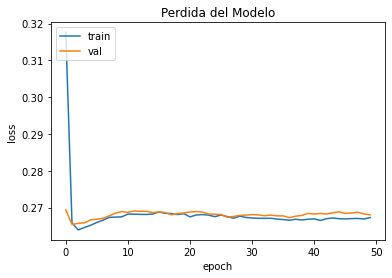

In [36]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Perdida del Modelo")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "val"], loc="upper left")
plt.show()

In [37]:
model.evaluate(x= X_val, y= y_val)

3601/3601 [==============================] - 2s 447us/step - loss: 0.2669


0.2668675184249878

In [38]:
model.evaluate(x= X_train, y= y_train)

10802/10802 [==============================] - 5s 443us/step - loss: 0.2640


0.2640399634838104

In [39]:
model.evaluate(x= X_test, y= y_test)

4801/4801 [==============================] - 2s 444us/step - loss: 0.2666


0.26658713817596436

In [40]:
model_50epoch= model

In [41]:
model.load_weights(path_checkpoint)

In [42]:
model.evaluate(x= X_val, y= y_val)

3601/3601 [==============================] - 2s 453us/step - loss: 0.3194


0.3194023072719574

In [43]:
model.evaluate(x= X_train, y= y_train)

10802/10802 [==============================] - 5s 446us/step - loss: 0.3140


0.3139525353908539

In [44]:
model.evaluate(x= X_test, y= y_test)

4801/4801 [==============================] - 2s 439us/step - loss: 0.3188


0.31883883476257324

#### Hacer predicciones

In [45]:
X_test[0:10, 0]

array([1440, 1419, 1315,   22,  902,  520, 2294, 2221, 2101, 1852],
      dtype=int64)

In [46]:
X_test[0:10, 1]

array([ 517, 1769,  387,  653, 1535, 1622,   21, 2230, 1227, 1217],
      dtype=int64)

In [47]:
X_test[0:10, [0,1]]

array([[1440,  517],
       [1419, 1769],
       [1315,  387],
       [  22,  653],
       [ 902, 1535],
       [ 520, 1622],
       [2294,   21],
       [2221, 2230],
       [2101, 1227],
       [1852, 1217]], dtype=int64)

In [48]:
model.predict(X_test[0:10, [0,1]])

array([[0.2309682 ],
       [0.1759091 ],
       [0.27930227],
       [0.43564945],
       [0.19414786],
       [0.28312808],
       [0.29672104],
       [0.22192648],
       [0.23210728],
       [0.176157  ]], dtype=float32)

In [49]:
df_arts['key'] = 1
df_cltes['key'] = 1
cj_clte_art= df_arts.merge(df_cltes, on ='key')

Obtenemos todos los clientes justo a todos los productos; es decir, para cada CLTE_ID tenemos los 2382 ART_ID. Desde el CLTE 'FMLA - 0001' con todos los 2382 ART_ID, hasta el CLTE 'FMLA - 2500' con todos los 2382 ART_ID.

2500 clientes x 2382 items = 5.955.000 registros

In [50]:
len(cj_clte_art)

5955000

Ejemplo de lo antes mencionado para el  CLTE 'FMLA - 0001' con todos los 2382 ART_ID

In [51]:
cj_clte_art.loc[ cj_clte_art.CLTE=='FMLA - 0001']

,ART_ID,ART,key,CLTE_ID,CLTE
0,0,*ATH ACCES:TOWEL BARS/SOAP D,1,0,FMLA - 0001
2500,1,*ATTERIES:CAMERA/FLASH/WATCH,1,0,FMLA - 0001
5000,2,*BOYS/GIRLS MISC TOYS,1,0,FMLA - 0001
7500,3,*GOURMET/UPSCALE,1,0,FMLA - 0001
10000,4,*MISC. LOBBY ITEMS,1,0,FMLA - 0001
...,...,...,...,...,...
5942500,2377,YELLOW SUMMER SQUASH,1,0,FMLA - 0001
5945000,2378,YNG MEN SCREEN PRINT T-SHIRTS,1,0,FMLA - 0001
5947500,2379,YOGURT,1,0,FMLA - 0001
5950000,2380,YOGURT MULTI-PACKS,1,0,FMLA - 0001


Ejemplo de lo antes mencionado para el CLTE 'FMLA - 2500' con todos los 2382 ART_ID

In [52]:
cj_clte_art.loc[ cj_clte_art.CLTE=='FMLA - 2500']

,ART_ID,ART,key,CLTE_ID,CLTE
2499,0,*ATH ACCES:TOWEL BARS/SOAP D,1,2499,FMLA - 2500
4999,1,*ATTERIES:CAMERA/FLASH/WATCH,1,2499,FMLA - 2500
7499,2,*BOYS/GIRLS MISC TOYS,1,2499,FMLA - 2500
9999,3,*GOURMET/UPSCALE,1,2499,FMLA - 2500
12499,4,*MISC. LOBBY ITEMS,1,2499,FMLA - 2500
...,...,...,...,...,...
5944999,2377,YELLOW SUMMER SQUASH,1,2499,FMLA - 2500
5947499,2378,YNG MEN SCREEN PRINT T-SHIRTS,1,2499,FMLA - 2500
5949999,2379,YOGURT,1,2499,FMLA - 2500
5952499,2380,YOGURT MULTI-PACKS,1,2499,FMLA - 2500


Observamos otro ejemplo en donde el articulo ART_ID 0 esta hecho join con todos los 2500 CLTE

In [53]:
cj_clte_art.loc[ cj_clte_art.ART_ID==0]

,ART_ID,ART,key,CLTE_ID,CLTE
0,0,*ATH ACCES:TOWEL BARS/SOAP D,1,0,FMLA - 0001
1,0,*ATH ACCES:TOWEL BARS/SOAP D,1,1,FMLA - 0002
2,0,*ATH ACCES:TOWEL BARS/SOAP D,1,2,FMLA - 0003
3,0,*ATH ACCES:TOWEL BARS/SOAP D,1,3,FMLA - 0004
4,0,*ATH ACCES:TOWEL BARS/SOAP D,1,4,FMLA - 0005
...,...,...,...,...,...
2495,0,*ATH ACCES:TOWEL BARS/SOAP D,1,2495,FMLA - 2496
2496,0,*ATH ACCES:TOWEL BARS/SOAP D,1,2496,FMLA - 2497
2497,0,*ATH ACCES:TOWEL BARS/SOAP D,1,2497,FMLA - 2498
2498,0,*ATH ACCES:TOWEL BARS/SOAP D,1,2498,FMLA - 2499


Hacemos la prediccion en el modelo, El modelo devuelve en porcentaje de la probabilidad de que un cliente pueda adquirir un producto.

In [54]:
model.predict(cj_clte_art.loc[0:10, ['ART_ID','CLTE_ID']])

array([[0.48729026],
       [0.44329068],
       [0.45895272],
       [0.56194395],
       [0.58886045],
       [0.44127688],
       [0.35770363],
       [0.37105238],
       [0.5694914 ],
       [0.53816074],
       [0.5737771 ]], dtype=float32)

In [55]:
cj_clte_art.loc[0:10, ['ART_ID','ART','CLTE_ID','CLTE']]

,ART_ID,ART,CLTE_ID,CLTE
0,0,*ATH ACCES:TOWEL BARS/SOAP D,0,FMLA - 0001
1,0,*ATH ACCES:TOWEL BARS/SOAP D,1,FMLA - 0002
2,0,*ATH ACCES:TOWEL BARS/SOAP D,2,FMLA - 0003
3,0,*ATH ACCES:TOWEL BARS/SOAP D,3,FMLA - 0004
4,0,*ATH ACCES:TOWEL BARS/SOAP D,4,FMLA - 0005
5,0,*ATH ACCES:TOWEL BARS/SOAP D,5,FMLA - 0006
6,0,*ATH ACCES:TOWEL BARS/SOAP D,6,FMLA - 0007
7,0,*ATH ACCES:TOWEL BARS/SOAP D,7,FMLA - 0008
8,0,*ATH ACCES:TOWEL BARS/SOAP D,8,FMLA - 0009
9,0,*ATH ACCES:TOWEL BARS/SOAP D,9,FMLA - 0010


Por ejemplo observamos que hay una probabilidad de:
- 48.72% de que el cliente FMLA - 0001 adquiera el articulo \*ATH ACCES:TOWEL BARS/SOAP D
- 58.88% de que el cliente FMLA - 0005 adquiera el articulo \*ATH ACCES:TOWEL BARS/SOAP D 
- 57.37% de que el cliente FMLA - 0011 adquiera el articulo \*ATH ACCES:TOWEL BARS/SOAP D 

y asi conforme se muestra en las predicciones

Otro ejemplo:

In [56]:
model.predict(cj_clte_art.loc[2500:2510, ['ART_ID','CLTE_ID']])

array([[0.44947588],
       [0.4061857 ],
       [0.42152938],
       [0.52426004],
       [0.5516446 ],
       [0.40421808],
       [0.32359838],
       [0.33634084],
       [0.5319159 ],
       [0.5002504 ],
       [0.5362711 ]], dtype=float32)

In [57]:
cj_clte_art.loc[2500:2510, ['ART_ID','ART','CLTE_ID','CLTE']]

,ART_ID,ART,CLTE_ID,CLTE
2500,1,*ATTERIES:CAMERA/FLASH/WATCH,0,FMLA - 0001
2501,1,*ATTERIES:CAMERA/FLASH/WATCH,1,FMLA - 0002
2502,1,*ATTERIES:CAMERA/FLASH/WATCH,2,FMLA - 0003
2503,1,*ATTERIES:CAMERA/FLASH/WATCH,3,FMLA - 0004
2504,1,*ATTERIES:CAMERA/FLASH/WATCH,4,FMLA - 0005
2505,1,*ATTERIES:CAMERA/FLASH/WATCH,5,FMLA - 0006
2506,1,*ATTERIES:CAMERA/FLASH/WATCH,6,FMLA - 0007
2507,1,*ATTERIES:CAMERA/FLASH/WATCH,7,FMLA - 0008
2508,1,*ATTERIES:CAMERA/FLASH/WATCH,8,FMLA - 0009
2509,1,*ATTERIES:CAMERA/FLASH/WATCH,9,FMLA - 0010


Observamos que hay una probabilidad de:
- 44.94% de que el cliente FMLA - 0002 adquiera el articulo \*ATTERIES:CAMERA/FLASH/WATCH
- 55.16% de que el cliente FMLA - 0005 adquiera el articulo \*ATTERIES:CAMERA/FLASH/WATCH
- 53.62% de que el cliente FMLA - 0011 adquiera el articulo \*ATTERIES:CAMERA/FLASH/WATCH

y asi conforme se muestra en las predicciones

Unimos las predicciones de cada cliente con su respectivo cliente. Así de esta manera obtenemos cual es la probabilidad de que un cliente adquiera un producto

In [58]:
cj_clte_art['PREDICCION']=model.predict(cj_clte_art.loc[0 :len(cj_clte_art) , ['ART_ID','CLTE_ID']])
cj_clte_art['PREDICCION100']=cj_clte_art['PREDICCION']*100
cj_clte_art

,ART_ID,ART,key,CLTE_ID,CLTE,PREDICCION,PREDICCION100
0,0,*ATH ACCES:TOWEL BARS/SOAP D,1,0,FMLA - 0001,0.482419,48.241882
1,0,*ATH ACCES:TOWEL BARS/SOAP D,1,1,FMLA - 0002,0.438483,43.848289
2,0,*ATH ACCES:TOWEL BARS/SOAP D,1,2,FMLA - 0003,0.454114,45.411366
3,0,*ATH ACCES:TOWEL BARS/SOAP D,1,3,FMLA - 0004,0.557137,55.713718
4,0,*ATH ACCES:TOWEL BARS/SOAP D,1,4,FMLA - 0005,0.584130,58.413048
...,...,...,...,...,...,...,...
5954995,2381,YOGURT NOT MULTI-PACKS,1,2495,FMLA - 2496,0.699520,69.951996
5954996,2381,YOGURT NOT MULTI-PACKS,1,2496,FMLA - 2497,0.653021,65.302147
5954997,2381,YOGURT NOT MULTI-PACKS,1,2497,FMLA - 2498,0.747837,74.783669
5954998,2381,YOGURT NOT MULTI-PACKS,1,2498,FMLA - 2499,0.760261,76.026115


Guardamos el archivo para poder almacenarlo en una base de datos y poder acceder a ella desde Power BI, Qlik Sense, Tableau, etc.

In [62]:
cj_clte_art.to_csv('PREDICCIONES_ARTICULOS.csv', index=False)

### Construimos un segundo modelo con otros parametros

In [67]:
EMBEDDING_SIZE = 50


class RecommenderNet2(keras.Model):
    def __init__(self, num_users, num_movies, embedding_size, **kwargs):
        super(RecommenderNet2, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_movies = num_movies
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.user_bias = layers.Embedding(num_users, 1)
        self.movie_embedding = layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.movie_bias = layers.Embedding(num_movies, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        movie_vector = self.movie_embedding(inputs[:, 1])
        movie_bias = self.movie_bias(inputs[:, 1])
        dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)
        # Add all the components (including bias)
        x = dot_user_movie + user_bias + movie_bias
        # The sigmoid activation forces the rating to between 0 and 1
        return tf.nn.sigmoid(x)


model2 = RecommenderNet2(len(lst_articulos), len(lst_cltes), EMBEDDING_SIZE)
model2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(), optimizer=keras.optimizers.Adam(lr=0.001)
)

In [68]:
history2 = model2.fit(
    x=X_train,
    y=y_train,
    batch_size=64,
    epochs=5,
    verbose=1,
    validation_data=(X_val, y_val),
)

Epoch 1/5
5401/5401 [==============================] - 5s 915us/step - loss: 0.3148 - val_loss: 0.2697
Epoch 2/5
5401/5401 [==============================] - 5s 960us/step - loss: 0.2673 - val_loss: 0.2682
Epoch 3/5
5401/5401 [==============================] - 5s 939us/step - loss: 0.2682 - val_loss: 0.2699
Epoch 4/5
5401/5401 [==============================] - 5s 902us/step - loss: 0.2711 - val_loss: 0.2721
Epoch 5/5
5401/5401 [==============================] - 5s 937us/step - loss: 0.2736 - val_loss: 0.2751


Existe mayor pedida por lo que el primer modelo tendrá mejores resultados

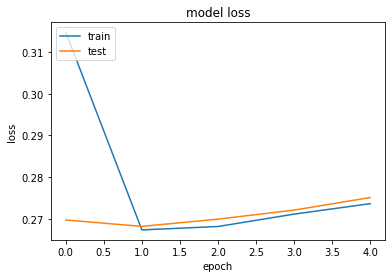

In [69]:
plt.plot(history2.history["loss"])
plt.plot(history2.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()